# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

# Loading the flats data
flats_df = pd.read_csv("Raw_data/Flats.csv")

## Exploratory data analysis and Data Cleaning

In [3]:
# This will make sure we are getting full view of targetted rows 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# Shape of the dataframe
flats_df.shape

(3028, 20)

In [5]:
# 3 Random rows from dataframe
flats_df.sample(3)

,property_name,link,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
2569,2 BHK Flat in Sector 81 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Signature Global City 81,89 Lac,"₹ 8,279/sq.ft.",Carpet area: 1075 (99.87 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Others,"Sector 81 Gurgaon, Gurgaon, Haryana",3rd of 4 Floors,North,Oct 2024,"['Ambience Mall New', 'Dwarka Expressway', 'NH...","Payment in quaterly installments , to pays app...","['2 Wardrobe', '4 Fan', '2 Geyser', '4 Light',...","['Feng Shui / Vaastu Compliant', 'Intercom Fac...","['Environment4.5 out of 5', 'Lifestyle4 out of...",M68963232
1187,3 BHK Flat in Sector 77 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Umang Winter Hills3.9 ★,92 Lac,"₹ 5,049/sq.ft.",Super Built up area 1822(169.27 sq.m.)Carpet a...,3 Bedrooms,3 Bathrooms,3 Balconies,Others,"Sector 77 Gurgaon, Gurgaon, Haryana",17th of 18 Floors,North-East,1 to 5 Year Old,"['Entertainland Mall', 'Delhi Jaipur Expresswa...",Located in the popular residential address of ...,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction5 out of...",G68287864
953,3 BHK Flat in DLF Phase 5,https://www.99acres.com/3-bhk-bedroom-apartmen...,DLF Trinity Towers3.7 ★,3.8 Crore,"₹ 15,510/sq.ft.",Built Up area: 2450 (227.61 sq.m.),3 Bedrooms,3 Bathrooms,3+ Balconies,"Pooja Room,Servant Room","DLF Phase 5, Gurgaon, Haryana",1st of 19 Floors,South-East,5 to 10 Year Old,"['Sector 53-54', 'Sahara Mall', 'Golf Course R...",Dlf trinity towers is one of gurgaon's most so...,"['4 Wardrobe', '1 Water Purifier', '6 Fan', '1...","['Power Back-up', 'Lift(s)', 'Maintenance Staf...","['Green Area4 out of 5', 'Construction4 out of...",T69408490


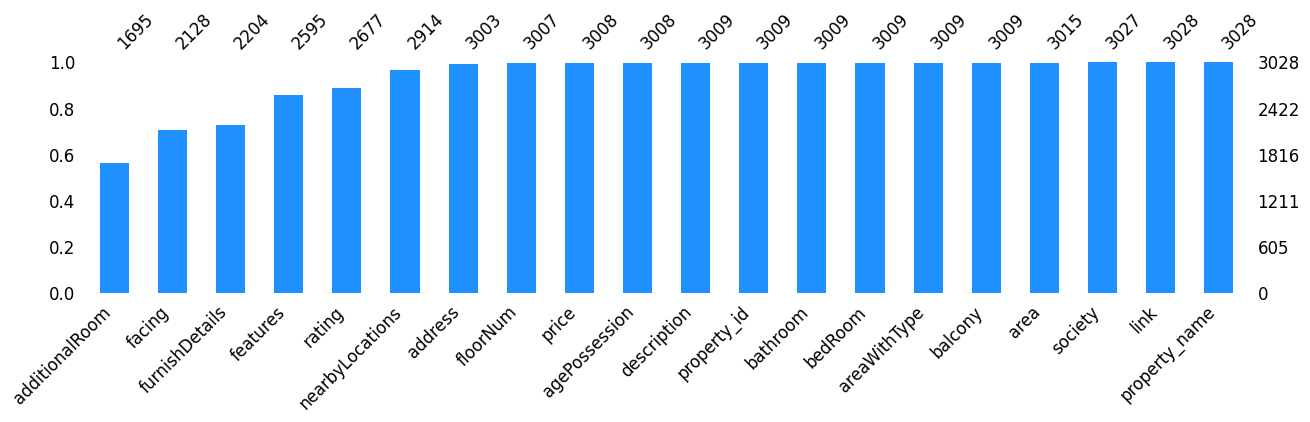

In [6]:
# Visualize missing values using a bar chart
msno.bar(flats_df, figsize=(15, 3), color="dodgerblue", sort="ascending", fontsize=12)
plt.show()

In [7]:
# Checking any duplicate values
if flats_df.duplicated().sum() == 0:
    print("No Duplicate values")
else:
    print("Removed duplicates")
    flats_df.drop_duplicates(inplace=True)

No Duplicate values


In [8]:
# Dropping unnecessary columns from dataframe
flats_df.drop(['property_id','link'],axis=1,inplace=True)

In [9]:
flats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    3028 non-null   object
 1   society          3027 non-null   object
 2   price            3008 non-null   object
 3   area             3015 non-null   object
 4   areaWithType     3009 non-null   object
 5   bedRoom          3009 non-null   object
 6   bathroom         3009 non-null   object
 7   balcony          3009 non-null   object
 8   additionalRoom   1695 non-null   object
 9   address          3003 non-null   object
 10  floorNum         3007 non-null   object
 11  facing           2128 non-null   object
 12  agePossession    3008 non-null   object
 13  nearbyLocations  2914 non-null   object
 14  description      3009 non-null   object
 15  furnishDetails   2204 non-null   object
 16  features         2595 non-null   object
 17  rating           2677 non-null   

In [10]:
# Removing any rating and lowercasing the society names to reduce the dimensionality 
flats_df['society'] = flats_df['society'].apply(lambda name: re.sub(r'\d+(\.\d+)?\s?★', '', str(name)).strip()).str.lower()

- In the price column the units of values are Lac and Crore respectively so first we will make `same units`
- There are few rows having `price='Price on Request'` so we will removing such rows from the dataframe as we only want the rows having some price values.
- Ohter than this in the price features there are few floating point values such as `0.011000000000000001`. So we will remove them as they don't have any unit.
- There is a particular record having value price = `price`

In [11]:
flats_df[flats_df['price'] == 'price']

,property_name,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
286,property_name,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating


In [12]:
print("Indexes having Price on Request values:",flats_df[flats_df['price'] == 'Price on Request'].index)
flats_df.drop([25, 1645, 1973, 2055, 2358, 2523, 2550, 2641, 2960, 2973, 2974, 286],axis=0,inplace=True)

# Resetting the indexes
flats_df.reset_index(drop=True,inplace=True)

# Imputing missing values with mode value
flats_df['price'] = flats_df['price'].fillna(flats_df['price'].mode()[0])

Indexes having Price on Request values: Int64Index([25, 1645, 1973, 2055, 2358, 2523, 2550, 2641, 2960, 2973, 2974], dtype='int64')


In [13]:
# Converting Lac to Crore
for i in range(len(flats_df)):
    try:
        item = flats_df['price'].iloc[i]
        if type(item) == float:
            flats_df['price'].iloc[i] = np.nan
        else:
            if item.split()[1] == 'Lac':
                flats_df['price'].iloc[i] = round(float(item.split()[0])/100,2)
            else:
                flats_df['price'].iloc[i] = round(float(item.split()[0]),2)
    except Exception as e:
        print(e)
        print("Index : ",i)

flats_df['price'] = flats_df['price'].astype(np.float64)

In the `area` feature we can see that other than the value itself there are few units used, but since these units will not be useful so we will simply extract the actual value of price per square feet and remove all other symbols.

In [14]:
# Just for refence and understanding
str = '₹ 5,000/sq.ft.'
float(str.split()[1].split('/')[0].replace(",",""))

5000.0

In [15]:
# Imputing the missing values with mode value
flats_df['area'] = flats_df['area'].fillna(flats_df['area'].mode()[0])

for i in range(len(flats_df)):
    try:
        item = flats_df.loc[i, 'area']
        flats_df.loc[i, 'area'] = float(item.split()[1].split('/')[0].replace(",",""))
    except Exception as e:
        print(e)
        print("Index giving error : ",i)

flats_df.rename(columns={'area': 'Price_Per_SQFT'},inplace=True)
flats_df['Price_Per_SQFT'] = flats_df['Price_Per_SQFT'].astype(np.float64)

In the `areaWithType` feature we are given a lot of different area type information collectively, for example in some rows we will see that `Carpet area` and `Super Built up area` are given in the same row.

In [16]:
# All the rows where all the 3 feature values are missing
Indexes = flats_df[(flats_df['bedRoom'].isna()) & (flats_df['bathroom'].isna()) & (flats_df['balcony'].isna())].index
print("Indexes will all feature values missing are : ",Indexes)

Indexes will all feature values missing are :  Int64Index([2841, 2842, 2843, 2844, 2914, 2915, 2916, 2918, 2919, 2982, 2983,
            2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991],
           dtype='int64')


Since for the above rows all other feature values are also missing so the best approach would be to simply ignore all these rows from the dataset.

In [17]:
flats_df.drop([2841, 2842, 2843, 2844, 2914, 2915, 2916, 2918, 2919, 2982, 2983,
            2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991],inplace=True,axis=0)

# Resetting the indexes
flats_df.reset_index(drop=True,inplace=True)

In [18]:
# Just for referenec and better understanding
str = '3 Bedrooms'
str.split()[0]

'3'

In [19]:
for feature in ['bedRoom','bathroom','balcony']:
    """
    In the balcony feature we have No balcony and 3+ balcony values so we need to make sure that
    we are considering this feature as a categorical rather than numerical.
    """
    if feature == 'balcony':
        for i in range(len(flats_df)):
            try:
                item = flats_df.loc[i,feature]
                item = item.split()[0]
                if item == 'No':
                    flats_df.loc[i,feature] = 0
                else:
                    flats_df.loc[i,feature] = item
            except Exception as e:
                print(e)
                print("Index giving error : ",i)
    else:
        for i in range(len(flats_df)):
            try:
                item = flats_df.loc[i,feature]
                flats_df.loc[i,feature] = float(item.split()[0])
            except Exception as e:
                print(e)
                print("Index giving error : ",i)

In the `additionalRoom` feature there are few flats which have NaN values so to make the things more understandable we will replace NaN with Not available.

In [20]:
# Replacing the values and lowercasing values to remove any random dimensionality due to Upper casing and lower casing
flats_df['additionalRoom'].fillna('Not available',inplace=True)
flats_df['additionalRoom'] = flats_df['additionalRoom'].str.lower()

Cleaning the floorNum values

In [21]:
str = '14th   of 14 Floors'
str = str.split()[0]
str[:-2]

'14'

In [22]:
# Imputing the missing values with mode value
flats_df['floorNum'] = flats_df['floorNum'].fillna(flats_df['floorNum'].mode()[0])

for i in range(len(flats_df)):
    try:
        item = flats_df.loc[i,'floorNum']
        item = item.split()[0]
        if item == 'Basement':
            flats_df.loc[i,'floorNum'] = -1
        elif (item == 'Ground') or (item == 'Lower'):
            flats_df.loc[i,'floorNum'] = 0
        else:  
            if len(item) == 2:
                flats_df.loc[i,'floorNum'] = int(item)
            else:
                flats_df.loc[i,'floorNum'] = int(item[:-2])
    except Exception as e:
        print(e)
        print("Index giving error : ",i)

By utilizing the features `price` and `Price_Per_SQFT` let's create a new feature called `area`

In [23]:
area = []
for i in range(len(flats_df)):
    price_value = int(flats_df['price'].iloc[i] *10000000)
    price_psqft = int(flats_df['Price_Per_SQFT'].iloc[i])
    area.append(int(price_value/price_psqft))

# Inserting new feature called area 
flats_df.insert(loc=4,column='Area',value = area)

# Adding new feature for property type
flats_df.insert(loc=1,column='Property_Type',value = 'flat')

In [24]:
flats_df.to_csv('Cleaned_datasets/Clean_Flats_V1.csv',index=False)